In [1]:
import pandas as pd #data frame
import seaborn as sns # analysis / visualization
from matplotlib import pyplot as plt  # ploting
import numpy as np       # linear algebra calculation
from sklearn.model_selection import train_test_split as tts  # data spliting
from sklearn.tree import DecisionTreeClassifier # decision tree algorithm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve

import warnings as w
w.filterwarnings('ignore')

In [2]:
df = pd.read_csv("heart failure.csv")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape

(299, 13)

In [5]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

# Seperate x,y

In [6]:
x = df.drop('DEATH_EVENT', axis='columns')

In [7]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [8]:
y = df['DEATH_EVENT']

In [9]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

# split the dataset into train and test 

In [10]:
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=.30,random_state=1)

In [11]:
xtrain.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12
210,70.0,0,212,1,17,1,389000.0,1.0,136,1,1,188
236,75.0,0,119,0,50,1,248000.0,1.1,148,1,0,209
44,60.0,1,588,1,60,0,194000.0,1.1,142,0,0,33
163,50.0,1,2334,1,35,0,75000.0,0.9,142,0,0,126


In [12]:
xtrain.shape

(209, 12)

In [13]:
xtest.shape

(90, 12)

In [14]:
clf = DecisionTreeClassifier()

In [15]:
clf.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [16]:
ypred = clf.predict(xtest) # predicted result

In [17]:
ypred # predicted result

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [18]:
np.array(ytest) # actual result

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1], dtype=int64)

# CONFUSION MATRIX

In [19]:
#from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision, recall,f1 measure, specificity,auc-curve roc_curve

In [20]:
confusion_matrix(ytest, ypred)

array([[56,  8],
       [10, 16]], dtype=int64)

In [21]:
classification_report(ytest, ypred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.88      0.86        64\n           1       0.67      0.62      0.64        26\n\n    accuracy                           0.80        90\n   macro avg       0.76      0.75      0.75        90\nweighted avg       0.80      0.80      0.80        90\n'

In [22]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        64
           1       0.67      0.62      0.64        26

    accuracy                           0.80        90
   macro avg       0.76      0.75      0.75        90
weighted avg       0.80      0.80      0.80        90



In [23]:
cm = confusion_matrix(ytest, ypred)

In [24]:
cm

array([[56,  8],
       [10, 16]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

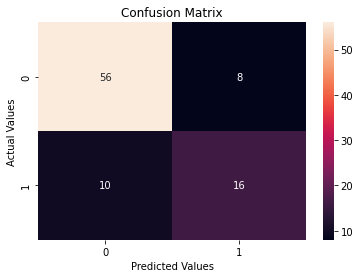

In [25]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')

In [26]:
tp, fn, fp, tn = confusion_matrix(ytest, ypred).reshape(-1)

In [27]:
(tp, fn, fp, tn )

(56, 8, 10, 16)

# Performance

In [28]:
accuracy = (tp+tn)/(tp+fp+tn+fn)

In [29]:
accuracy

0.8

In [30]:
precision = tp/(tp+fp)

In [31]:
precision

0.8484848484848485

In [32]:
recall = tp/(tp+fn)

In [33]:
recall

0.875

In [34]:
one_specificity = fp/(fp+tn)

In [35]:
one_specificity

0.38461538461538464

In [36]:
f1_measure = (precision+recall)/2

In [37]:
f1_measure

0.8617424242424243

In [38]:
f1_score = (2*precision*recall)/(precision+recall)

In [39]:
f1_score

0.8615384615384615

In [40]:
specificity_selectivity = tn/(tn+fp) 

In [41]:
specificity_selectivity

0.6153846153846154

In [42]:
threat_score = tp/(tp+fn+fp)

In [43]:
threat_score

0.7567567567567568

In [44]:
false_discovery_rate = fp/(tp+fp)
false_discovery_rate

0.15151515151515152

In [45]:
balanced_accuracy = (recall+specificity_selectivity)/2
balanced_accuracy

0.7451923076923077

In [46]:
informedness = recall- specificity_selectivity-1
informedness

-0.7403846153846154

In [47]:
import math

In [48]:
matthews_correlation_coefficient_MCC = (tp*tn-fp*fn)/math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)) 
matthews_correlation_coefficient_MCC

0.5026155365907202

In [49]:
fowlkes_mallows_index_FMI = math.sqrt(precision*recall) # This result is not same for two cases. why? 
fowlkes_mallows_index_FMI

0.8616404368553291

In [50]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics.cluster import fowlkes_mallows_score

In [51]:
matthews_corrcoef(ytest, ypred)

0.5026155365907202

In [52]:
fowlkes_mallows_score(ytest, ypred)

0.7279481742774276

# AUC_ROC Curve

In [53]:
from sklearn.metrics import plot_roc_curve

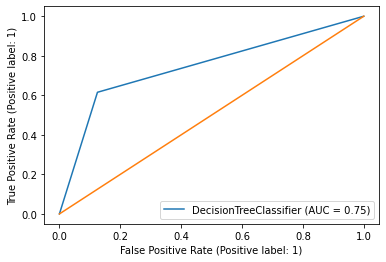

In [54]:
plot_roc_curve(clf, xtest, ytest)
plt.plot([0,1],[0,1])

In [55]:
accuracy_score(ytest, ypred)

0.8

In [56]:
clf.score(xtest, ytest)

0.8